### O objetivo deste projeto é apresentar uma análise simples de uma base de dados de fraudes em cartões de crédito. O projeto irá analisar o desempenho de algoritmos de classificação na detecção de fraudes. O objetivo deste trabalho tem fins de exploração das técnicas de ML e não visa apresentar um modelo de utilidade em produção.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df_inicial = pd.read_csv(r'/content/creditcard.csv')

In [50]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
df_inicial.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [52]:
df_inicial.query('Class.isnull()')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [53]:
df_inicial = df_inicial.query('~Class.isnull()')

In [54]:
df_inicial.query("Class == 1")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [55]:
df_inicial['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

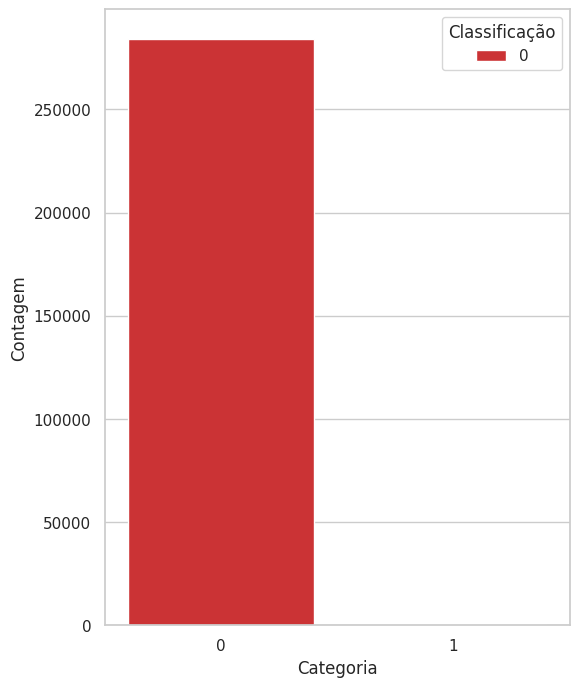

In [56]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 8))
sns.countplot(data=df_inicial, x='Class', palette='Set1')
plt.legend(title='Classificação', labels=['0','1'])
plt.xlabel('Categoria')
plt.ylabel("Contagem")
plt.show()

### Como podemos ver no gráfico, a quantidade de fraudes nesta base de dados é tão pequena que dimensionalmente é insignificante para a visualização.
### Seguiremos então com a análise exploratória da base

In [57]:
df_inicial.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [58]:
df_variaveis_desconhecidas = df_inicial.drop(columns=['Time', 'Amount', 'Class'], axis=1)
df_variaveis = df_inicial[['Time', 'Amount']]

In [59]:
def histograma(ncol, nrows, df, figsize=()):
  fig, ax = plt.subplots(ncols=ncol, nrows=nrows, figsize=(figsize))
  i = 0
  ax = ax.flatten()

  for coluna in df.columns:
    sns.histplot(df[coluna], ax=ax[i])
    i+= 1
  plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
  plt.show()

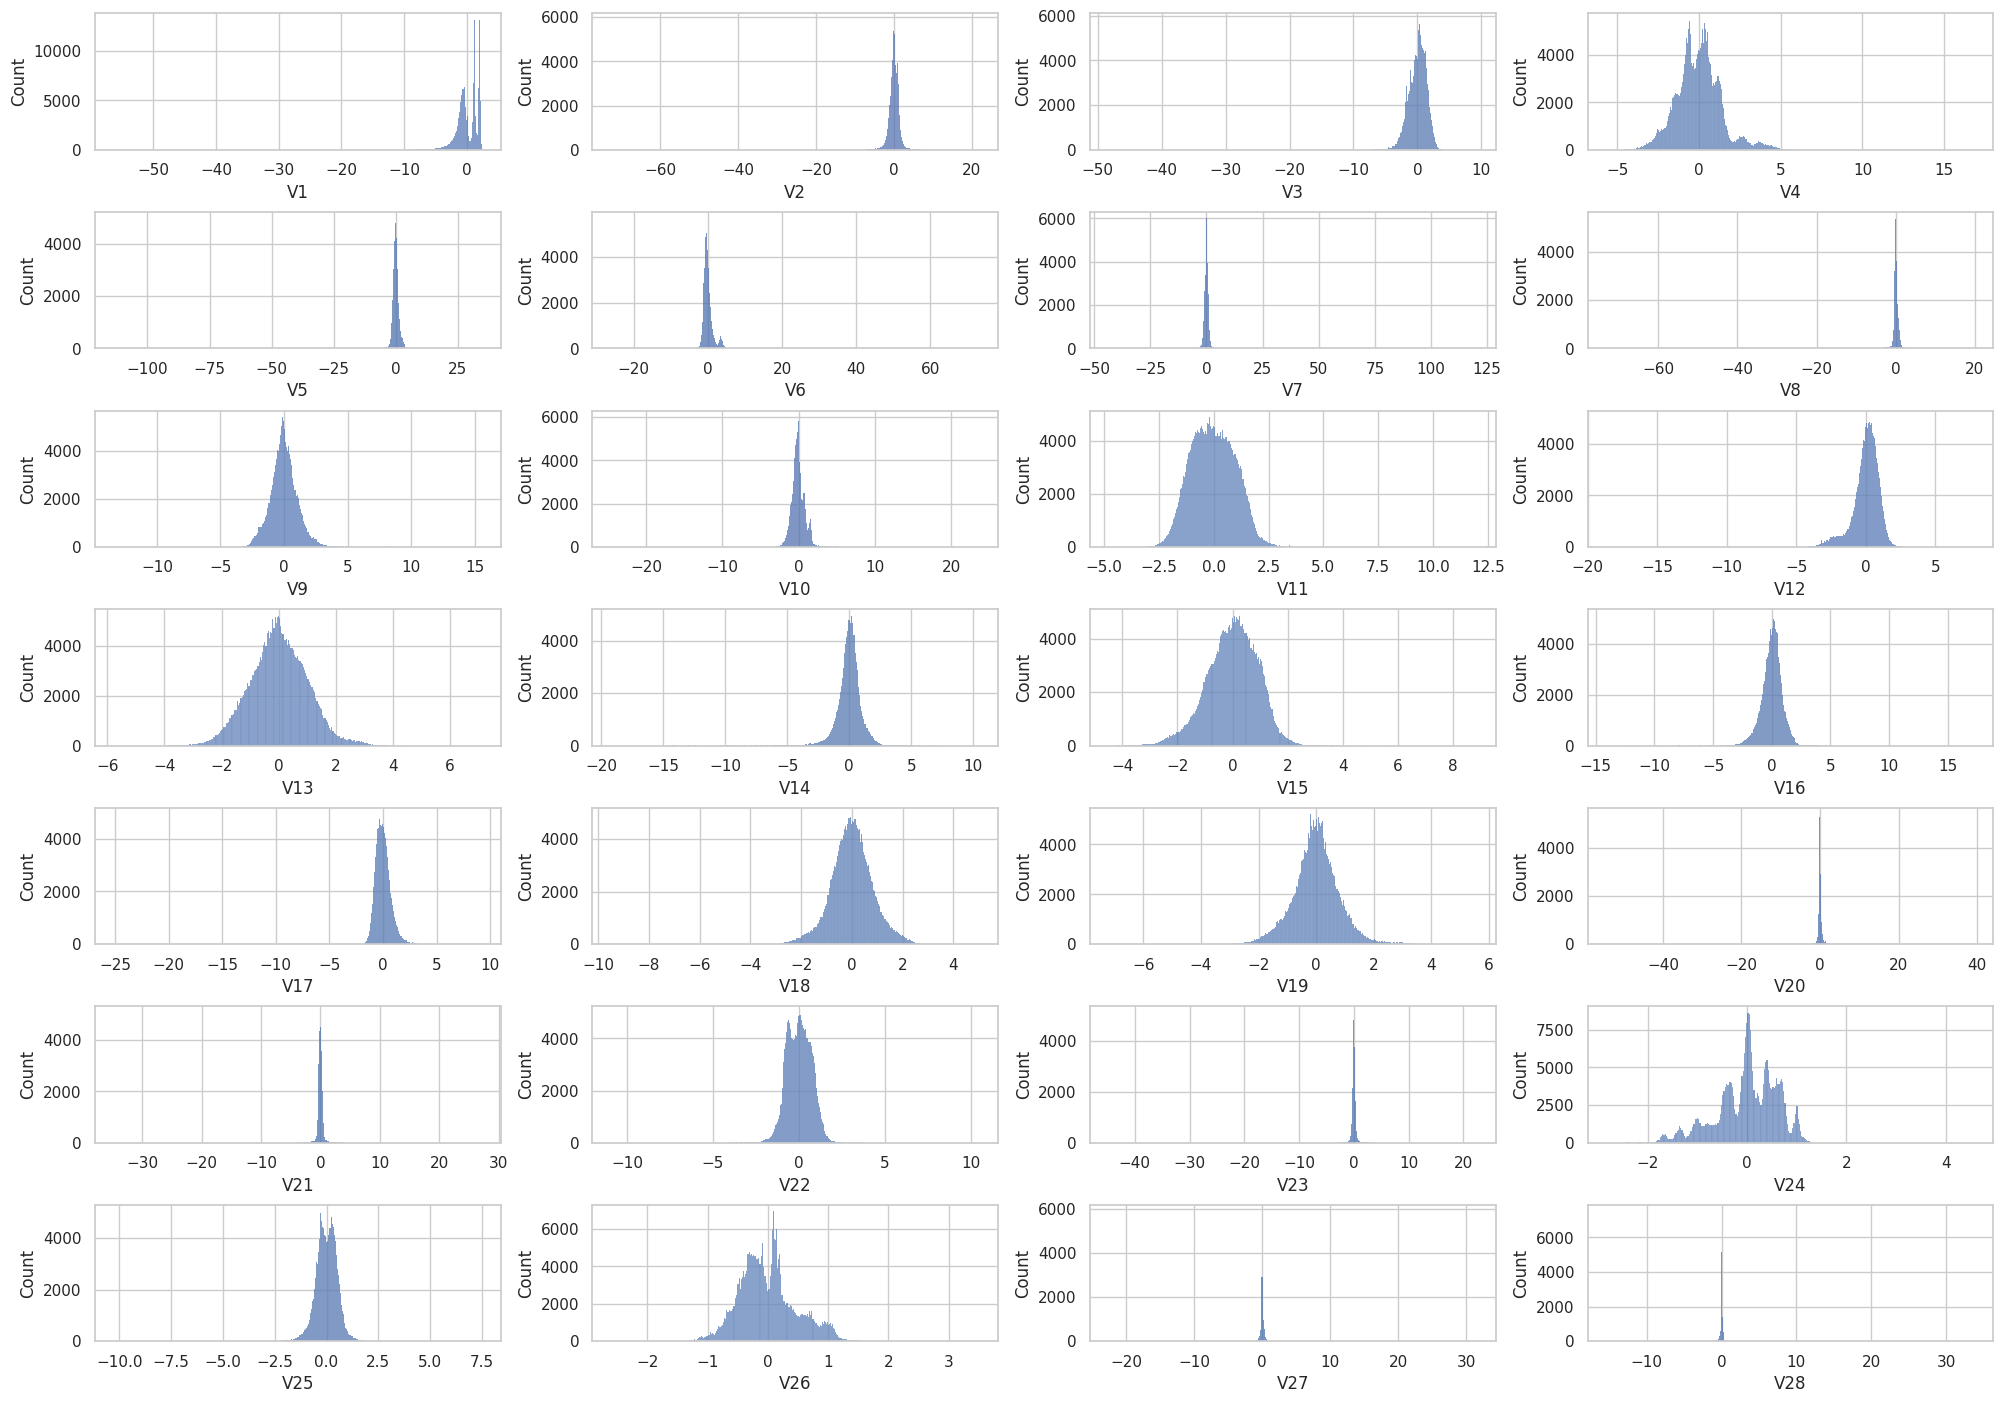

In [60]:
histograma(ncol=4, nrows=7, df=df_variaveis_desconhecidas, figsize=(20,14))

### Como mostram os histogramas, as variáveis desta base, em geral, possuem distribuições muito próximas de uma distribuição normal

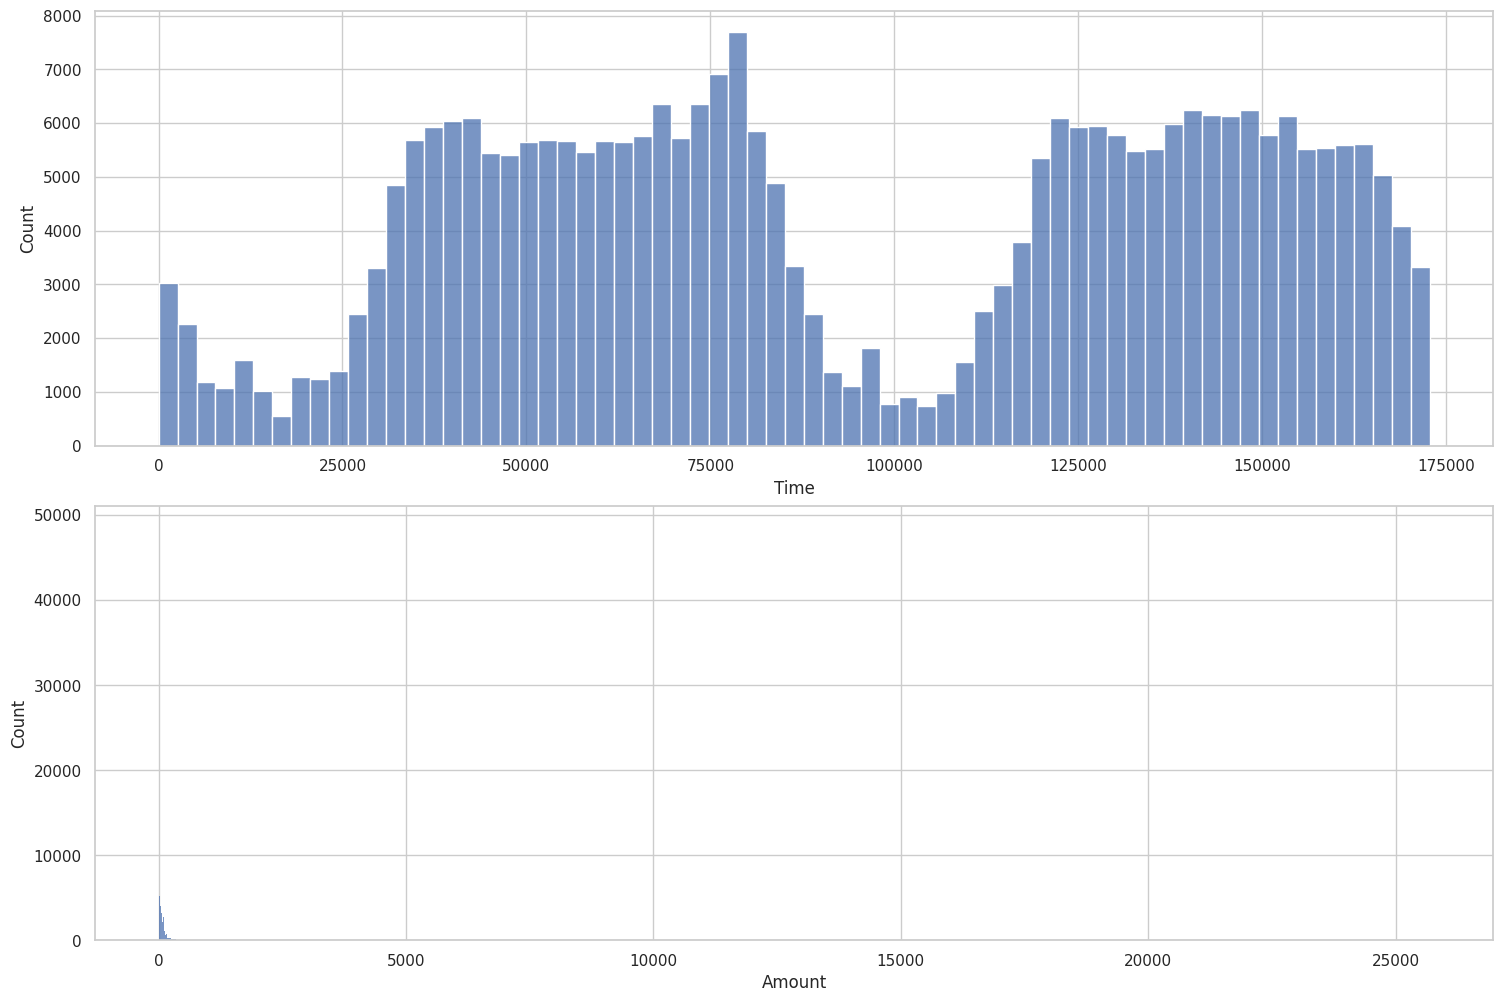

In [61]:
histograma(ncol=1, nrows=2, df=df_variaveis, figsize=(15,10))

Text(0.5, 1.0, 'Matriz de correlação')

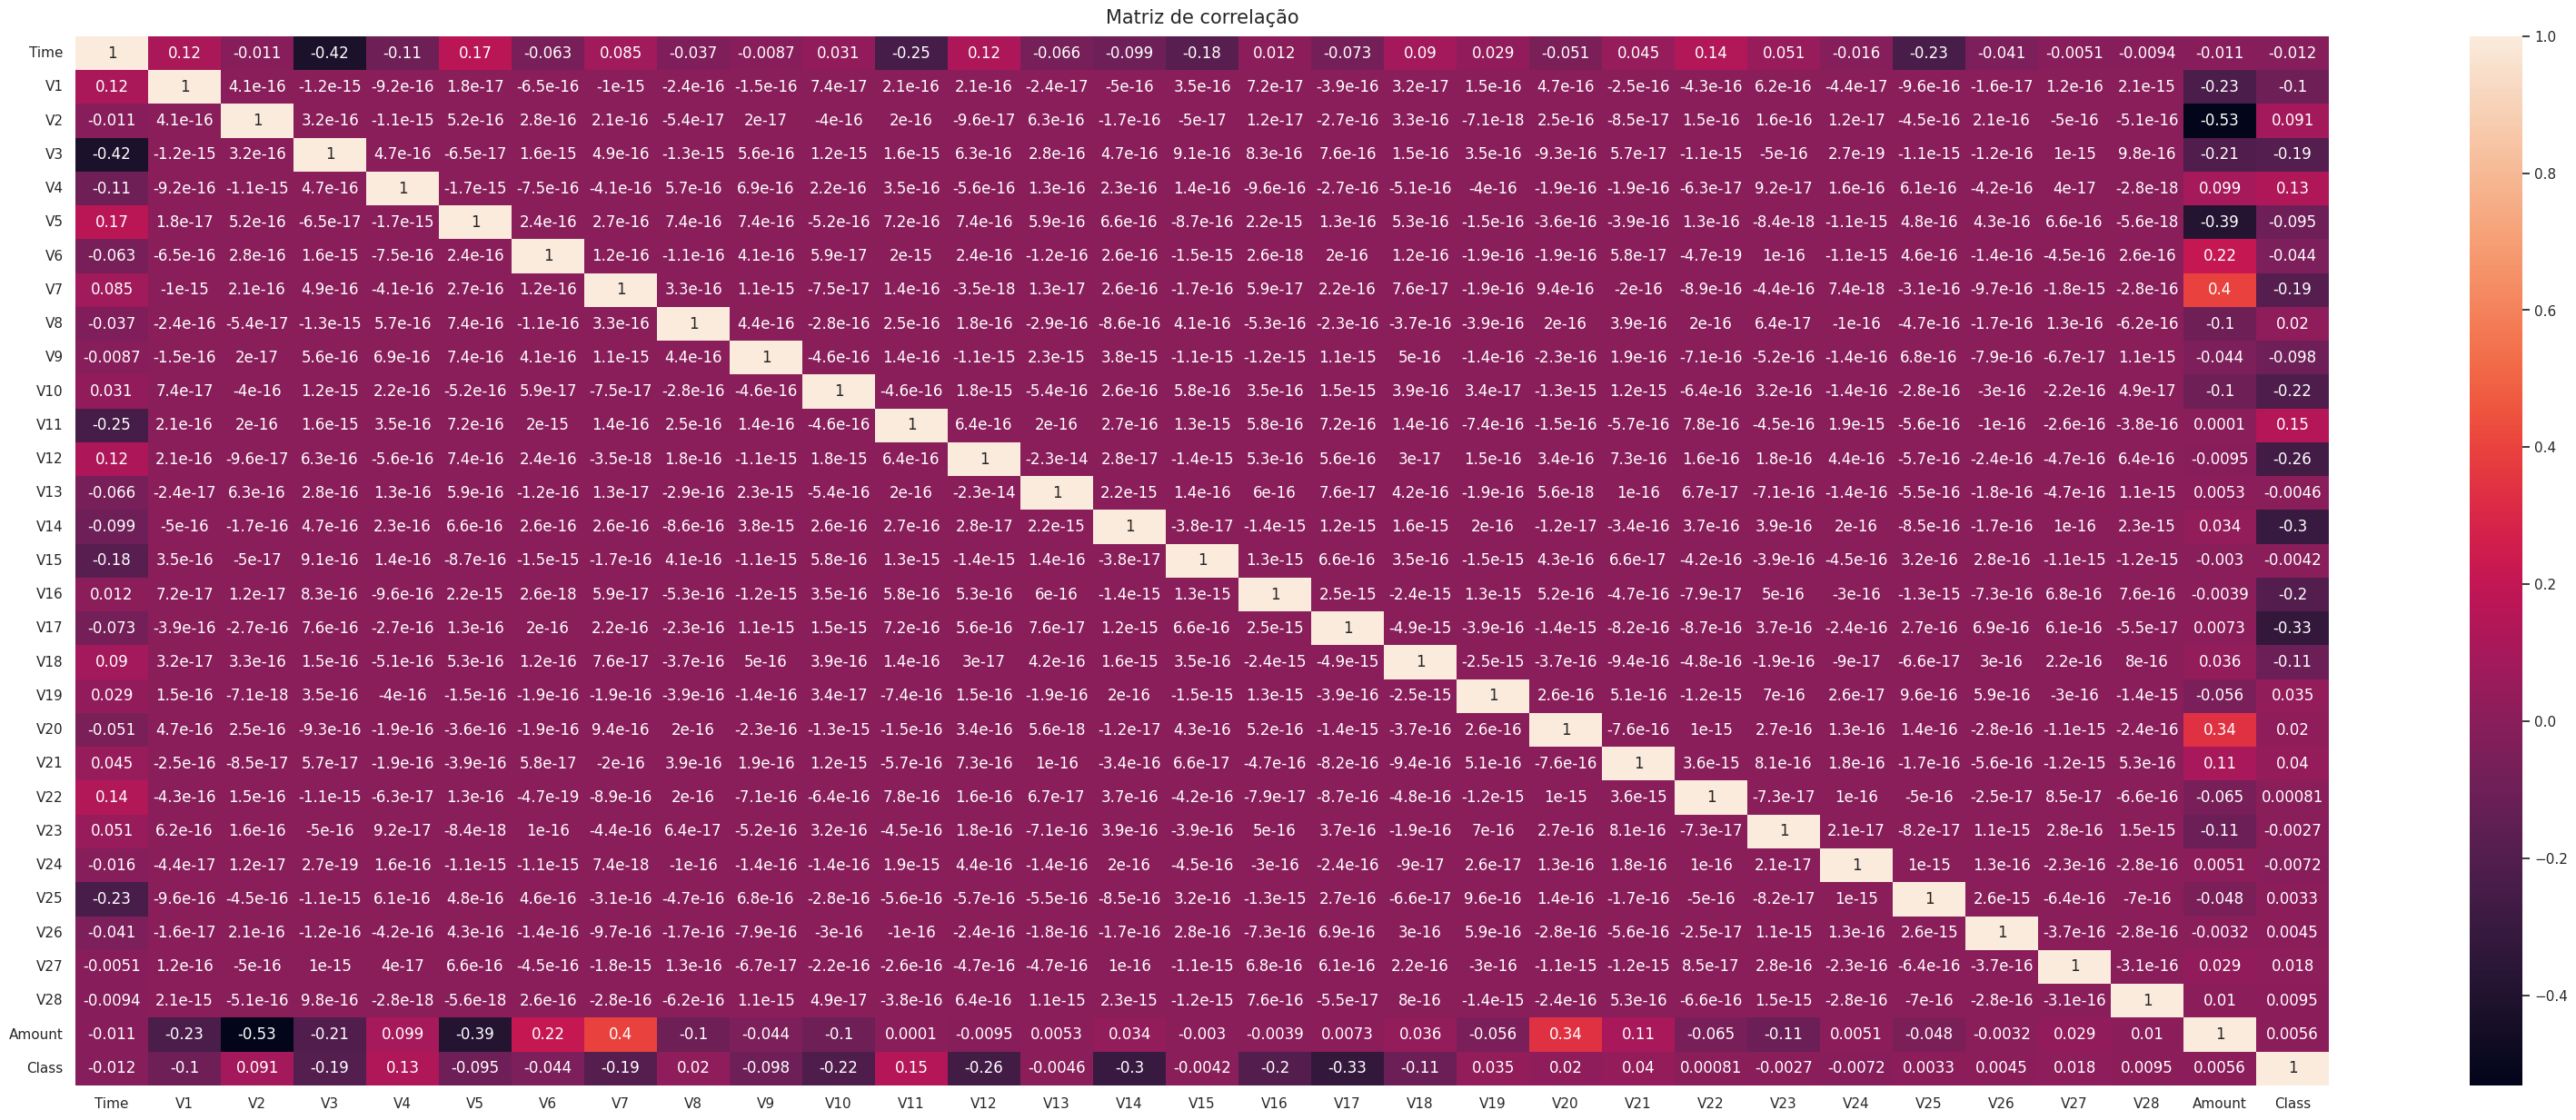

In [62]:
plt.figure(figsize=(40, 15))
matriz_corr = sns.heatmap(df_inicial.corr(), annot=True)
matriz_corr.set_title('Matriz de correlação', fontdict={'fontsize':15}, pad=10)

### As correlações mais fortes que vemos neste diagrama são entre Amount e V7 e Amount e V20, porém, não é uma correlação alta. Para algoritmos de RandomForest e Regressão logística, a correlação alta tem maior impacto na interpretação dos coeficientes e não nos resultados. Em outros trabalhos, correlações fortes poderiam indicar multicolinearidade e a necessidade de descartar alguma variável ou aplicação de PCA para redução de dimensionalidade.

### Agora, iremos separar os dados em treino e teste e avaliar os algoritmos

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [64]:
x = df_inicial.drop(columns='Class')
y = df_inicial['Class']

In [65]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)

In [66]:
def rf_cross_validation(x, y):
  rf_score = cross_val_score(rf, x, y, scoring='roc_auc', cv=10, n_jobs=1)
  for fold, score in enumerate(rf_score, start=1):
    print(f'{fold}: a AUC calculada foi de: {score:.2f}')

In [67]:
rf_score = cross_val_score(rf, x, y, scoring='roc_auc', cv=10, n_jobs=1)
for fold, score in enumerate(rf_score, start=1):
  print(f'{fold}: a AUC calculada foi de: {score:.2f}')

1: a AUC calculada foi de: 0.98
2: a AUC calculada foi de: 0.99
3: a AUC calculada foi de: 1.00
4: a AUC calculada foi de: 0.89
5: a AUC calculada foi de: 0.91
6: a AUC calculada foi de: 0.93
7: a AUC calculada foi de: 1.00
8: a AUC calculada foi de: 0.98
9: a AUC calculada foi de: 0.98
10: a AUC calculada foi de: 0.93


### Há uma diferença considerável entre cada AUC calculada, havendo valores de 1 contrastando com 0.89; Isto é causado pela baixa quantidade de amostras de fraudes.

In [68]:
def lr_cross_validation(x, y):
  lr = LogisticRegression()
  lr_score = cross_val_score(lr, x, y, scoring='roc_auc', cv=10, n_jobs=1)
  for fold, score in enumerate(lr_score, start=1):
    print(f'{fold}: a AUC calculada foi de: {score:.2f}')

In [69]:
lr = LogisticRegression()
lr_score = cross_val_score(lr, x, y, scoring='roc_auc', cv=10, n_jobs=1)
for fold, score in enumerate(lr_score, start=1):
  print(f'{fold}: a AUC calculada foi de: {score:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1: a AUC calculada foi de: 0.99
2: a AUC calculada foi de: 0.67
3: a AUC calculada foi de: 0.98
4: a AUC calculada foi de: 0.96
5: a AUC calculada foi de: 0.96
6: a AUC calculada foi de: 0.92
7: a AUC calculada foi de: 0.96
8: a AUC calculada foi de: 0.87
9: a AUC calculada foi de: 0.99
10: a AUC calculada foi de: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Neste caso, a discrepância entre os indicadores foi ainda maior, explicitando a necessidade de um trabalho com relação ao desbalanceamento, que será feito na próxima etapa do código.

### Iremos testar, primeiramente, métodos de undersampling e oversampling utilizando a função sample e testar o desempenho dos algoritmos.

In [70]:
contagem0, contagem1 = df_inicial['Class'].value_counts()

In [71]:
df_class0 = df_inicial.query("Class == 0")
df_class1 = df_inicial.query("Class == 1")

In [72]:
df0_under = df_class0.sample(contagem1)
df_teste_under = pd.concat([df0_under, df_class1])

In [73]:
df0_under.shape

(492, 31)

In [74]:
df0_under['Class'].value_counts()

0    492
Name: Class, dtype: int64

In [75]:
df1_over = df_class1.sample(contagem0, replace=True)
df_teste_over = pd.concat([df_class0, df1_over])

In [76]:
df_teste_over.shape

(568630, 31)

In [77]:
df1_over['Class'].value_counts()

1    284315
Name: Class, dtype: int64

### Agora que criamos os dataframes, iremos testar cada um dos métodos.

In [78]:
x_under = df_teste_under.drop(columns='Class')
y_under = df_teste_under['Class']
x_over = df_teste_over.drop(columns='Class')
y_over = df_teste_over['Class']

In [79]:
rf_cross_validation(x_under, y_under)

1: a AUC calculada foi de: 1.00
2: a AUC calculada foi de: 1.00
3: a AUC calculada foi de: 1.00
4: a AUC calculada foi de: 0.92
5: a AUC calculada foi de: 0.93
6: a AUC calculada foi de: 0.98
7: a AUC calculada foi de: 1.00
8: a AUC calculada foi de: 1.00
9: a AUC calculada foi de: 0.98
10: a AUC calculada foi de: 0.97


In [80]:
lr_cross_validation(x_under, y_under)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1: a AUC calculada foi de: 1.00
2: a AUC calculada foi de: 1.00
3: a AUC calculada foi de: 1.00
4: a AUC calculada foi de: 0.97
5: a AUC calculada foi de: 0.97
6: a AUC calculada foi de: 0.97
7: a AUC calculada foi de: 1.00
8: a AUC calculada foi de: 0.99
9: a AUC calculada foi de: 0.97
10: a AUC calculada foi de: 0.94


### Para a base de dados reduzida a discrepância foi menor em ambos algoritmos.

### Iremos analisar agora a base cujos registros de fraude foram aumentados.

In [81]:
rf_cross_validation(x_over, y_over)

1: a AUC calculada foi de: 0.95
2: a AUC calculada foi de: 0.99
3: a AUC calculada foi de: 0.99
4: a AUC calculada foi de: 0.99
5: a AUC calculada foi de: 0.99
6: a AUC calculada foi de: 0.98
7: a AUC calculada foi de: 0.99
8: a AUC calculada foi de: 0.99
9: a AUC calculada foi de: 0.99
10: a AUC calculada foi de: 0.96


In [82]:
lr_cross_validation(x_over, y_over)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1: a AUC calculada foi de: 0.94
2: a AUC calculada foi de: 0.96
3: a AUC calculada foi de: 0.97
4: a AUC calculada foi de: 0.95
5: a AUC calculada foi de: 0.99
6: a AUC calculada foi de: 0.98
7: a AUC calculada foi de: 0.98
8: a AUC calculada foi de: 0.99
9: a AUC calculada foi de: 0.99
10: a AUC calculada foi de: 0.99


### Neste caso, ambos algoritmos apresentaram uma generalização melhor

### Vamos testar agora analisando outras métricas além da AUC, por meio do classification report, que nos mostra a precisão para as classes 0 e 1, revocação e f1-score.

In [83]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [84]:
rf_prev_under = cross_val_predict(rf, x_under, y_under, cv=10, n_jobs=1)
rf_prev_over = cross_val_predict(rf, x_over, y_over, cv=10, n_jobs=1)
lr_prev_under = cross_val_predict(lr, x_under, y_under, cv=10, n_jobs=1)
lr_prev_over = cross_val_predict(lr, x_over, y_over, cv=10, n_jobs=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [85]:
def classification_r(prev, true):
  relatorio = classification_report(prev, true)
  print(relatorio)

In [86]:
relatorio_rf_under = classification_r(prev=rf_prev_under, true=y_under)
relatorio_rf_over = classification_r(prev=rf_prev_over, true=y_over)
relatorio_lr_under = classification_r(prev=lr_prev_under, true=y_under)
relatorio_lr_over = classification_r(prev=lr_prev_over, true=y_over)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       551
           1       0.88      1.00      0.93       433

    accuracy                           0.94       984
   macro avg       0.94      0.94      0.94       984
weighted avg       0.95      0.94      0.94       984

              precision    recall  f1-score   support

           0       0.99      0.90      0.95    312801
           1       0.89      0.99      0.94    255829

    accuracy                           0.94    568630
   macro avg       0.94      0.95      0.94    568630
weighted avg       0.95      0.94      0.94    568630

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       514
           1       0.91      0.96      0.94       470

    accuracy                           0.94       984
   macro avg       0.94      0.94      0.94       984
weighted avg       0.94      0.94      0.94       984

              preci

### Os modelos de RandomForest apresentaram melhor precisão para classificar os valores 0, porém, foram inferiores em apontar os verdadeiros positivos de 1. Já o algoritmo de regressão logística apresenta um maior equilíbrio entre a precisão de 0 e 1. Sendo assim, o modelo de regressão logística apresenta uma maior revocação. Uma revocação alta é importante pois indica que verdadeiros positivos não estão sendo classificados como negativos. Porém, o menor resultado de precisão da classe 0 no algoritmo de regressão logística representa o trade off que pode acontecer ao buscar uma revocação alta, pois a chance de haver mais falsos positivos é maior.

### Para finalizar, vamos tentar balancear os dados utilizando a técnica SMOTE. Esta técnica de balanceamento é baseada no algoritmo KNN (K-Nearest Neighbours) para criar exemplos sintéticos de dados na base.

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
smote = SMOTE(k_neighbors=6,sampling_strategy='auto', random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [89]:
rf_smote = RandomForestClassifier()
lr_smote = LogisticRegression()
prev_rf_smote = rf_smote.fit(x_smote, y_smote)
prev_lr_smote = lr_smote.fit(x_smote, y_smote)

In [90]:
resultado_rf_smote = rf_smote.predict(x)
resultado_lr_smote = rf_smote.predict(x)

In [91]:
relatorio_rf_smote = classification_r(prev=resultado_rf_smote, true=y)
relatorio_lr_smote = classification_r(prev=resultado_lr_smote, true=y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807



In [92]:
lr_cross_validation(x_smote, y_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1: a AUC calculada foi de: 0.98
2: a AUC calculada foi de: 0.99
3: a AUC calculada foi de: 0.98
4: a AUC calculada foi de: 0.98
5: a AUC calculada foi de: 0.99
6: a AUC calculada foi de: 1.00
7: a AUC calculada foi de: 1.00
8: a AUC calculada foi de: 1.00
9: a AUC calculada foi de: 1.00
10: a AUC calculada foi de: 1.00


In [93]:
rf_cross_validation(x_smote, y_smote)

1: a AUC calculada foi de: 0.97
2: a AUC calculada foi de: 0.99
3: a AUC calculada foi de: 0.99
4: a AUC calculada foi de: 1.00
5: a AUC calculada foi de: 1.00
6: a AUC calculada foi de: 0.99
7: a AUC calculada foi de: 0.99
8: a AUC calculada foi de: 0.99
9: a AUC calculada foi de: 0.99
10: a AUC calculada foi de: 0.97


### Os modelos treinados nas bases balanceadas utilizando SMOTE obtiveram melhores resultados e, de acordo com a validação cruzada, tiveram melhor generalização. Os resultados do classification report obtido pela base balanceada por meio do SMOTE são melhores do que os anteriores.

### Neste simples estudo, foi possível abordar técnicas de análise exploratória básica, construção de modelos, balanceamento de classes e validação cruzada. Em um conjunto de dados mais complexo, técnicas como PCA, tunagem de hiperparâmetros e utilização de algoritmos ensemble poderiam ser utilizados para desempenhar melhores resultados. Para este caso, apenas o balanceamento das classes já nos trouxe resultados satisfatórios.